In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [6]:
df=pd.read_csv('housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [8]:
df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [9]:
df.drop_duplicates(inplace=True)

In [15]:
df_new=pd.get_dummies(df, columns=['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea'
                            ,'furnishingstatus'],drop_first=True)

In [16]:
df_new.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,True,False,False,False,True,True,False,False
1,12250000,8960,4,4,4,3,True,False,False,False,True,False,False,False
2,12250000,9960,3,2,2,2,True,False,True,False,False,True,True,False
3,12215000,7500,4,2,2,3,True,False,True,False,True,True,False,False
4,11410000,7420,4,1,2,2,True,True,True,False,True,False,False,False


In [22]:
X=df_new.drop('price',axis=1)
X.head()

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,7420,4,2,3,2,True,False,False,False,True,True,False,False
1,8960,4,4,4,3,True,False,False,False,True,False,False,False
2,9960,3,2,2,2,True,False,True,False,False,True,True,False
3,7500,4,2,2,3,True,False,True,False,True,True,False,False
4,7420,4,1,2,2,True,True,True,False,True,False,False,False


In [21]:
y=df_new['price']
y.head()

0    13300000
1    12250000
2    12250000
3    12215000
4    11410000
Name: price, dtype: int64

In [23]:
from sklearn.model_selection import train_test_split

In [25]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=15)

In [27]:
#model development
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score


In [28]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [32]:
#Prediction
y_pred=model.predict(X_test)

In [33]:
mean_squared_error(y_test,y_pred)

1392016974928.5562

In [34]:
r2_score(y_test,y_pred)

0.6327202871541675

In [35]:
np.sqrt(mean_squared_error(y_test,y_pred))

1179837.6900779854

In [37]:
coefs=model.coef_
intercept=model.intercept_

In [38]:
for feature,coef in zip(X.columns,coefs):
    print(f"{feature}:{coef:2f}")
print(f"Intercept:{intercept:.2f}")

area:259.728974
bedrooms:139579.178157
bathrooms:823295.648053
stories:504832.842355
parking:218852.820691
mainroad_yes:441085.520363
guestroom_yes:133840.343251
basement_yes:397067.865437
hotwaterheating_yes:821322.041812
airconditioning_yes:971670.906039
prefarea_yes:633620.093714
furnishingstatus_semi-furnished:-14172.131860
furnishingstatus_unfurnished:-437198.414905
Intercept:-3627.88


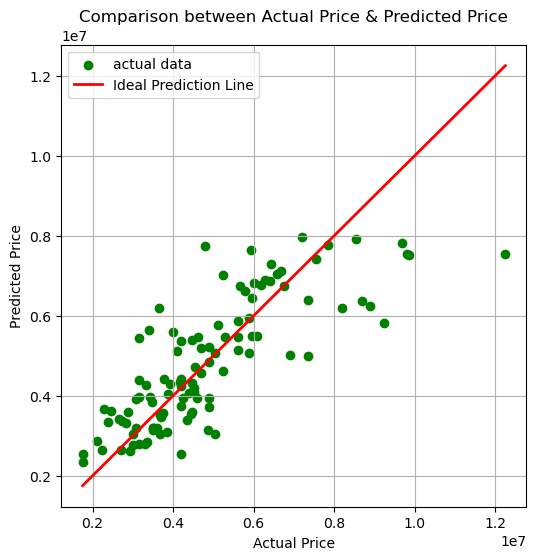

In [63]:
plt.figure(figsize=(6,6))
plt.scatter(y_test,y_pred,color='green',label='actual data')
min_val = min(min(y_test), min(y_pred))
max_val = max(max(y_test), max(y_pred))
plt.plot([min_val, max_val], [min_val, max_val], color='red', label='Ideal Prediction Line', linewidth=2)
plt.title('Comparison between Actual Price & Predicted Price')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.legend()
plt.grid(True)
plt.show()